#### Clusters Analysis usando o algoritmo k-means  

#### Objetivo: 
        Separar um conjunto de objetos/clientes em grupos (clusters) de forma que os membros de qualquer grupo formado 
        sejam os mais homogêneos possíveis com relação a algum critério, como por exemplo a distância euclidiana.



#### Procedimento:

#### (1) Selecionar  somente variáveis quantitativas (p).
#### (2) Análise exploratória dos dados. 
#### (3) Avaliar a presença de outliers e pontos extremos. 
#### (4) Padronizar as variáveis antes de se calcular as distâncias, assim, as "p" variáveis serão igualmente importantes. 
         Geralmente, a padronização feita é para que todas as variáveis (quantitativas) tenham média zero e variância 1.





In [1]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from collections import Counter


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [5]:
# Importar a base de dados Recência, Frequência e Valor (RFV)
BaseRFV = pd.read_csv(r'Bases/Bases/Base_RFV.csv',sep=',')

FileNotFoundError: [Errno 2] No such file or directory: 'Bases/Bases/Base_RFV.csv'

In [ ]:
BaseRFV.head()

In [ ]:
BaseRFV.info()

## Análise exploratória dos dados

- Utilize o Box Plot para detecção de outliers e pontos extremos
- Gráfico de dispersão para identificar correlação entre as variáveis

In [ ]:
BaseRFV.describe().round(2)

In [ ]:
dados= BaseRFV.drop(columns=['id_cliente'])

In [ ]:
# Selecionar as variáveis quantitativas
var_num = ['valor','compras','recencia']

In [ ]:
df = dados[var_num].copy()

In [ ]:
# Análise exploratória dos dados usando o gráfico Box Plot
features = var_num
fig,axs=plt.subplots(nrows=1, ncols=3, figsize=(18,10))
for col, ax in zip(features[0:], axs.ravel()):
    x=dados.loc[:, col]
    sns.boxplot(x, ax=ax, orient='V')
    plt.subplots_adjust(top=0.90,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.3)

In [ ]:
sns.heatmap(dados.corr(),cmap='coolwarm',annot=True)
plt.title('dados.corr()')

In [ ]:
sns.pairplot(dados,hue='compras',palette='coolwarm');

### Normalizar os dados

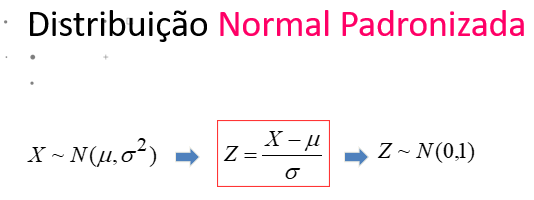




In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# padronizar a variável para Normal com média igual a zero e desvio padrão igual a 1
scaler = StandardScaler()

cols = dados.columns

dados_padrao= scaler.fit_transform(dados)

dados_padrao = pd.DataFrame(dados_padrao, columns=[cols])




In [ ]:
print(dados_padrao)

In [ ]:
pd.DataFrame(dados_padrao).describe().round(2)

### Análise de cluster

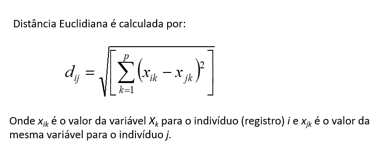

In [ ]:
# Elbow method (clustering)
# Encontrar o número de clusters
# nesta simulação avalie até quantos clusters (X) você quer testar 
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, X):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dados_padrao)
    sse.append(kmeans.inertia_)

In [ ]:
# Gráfico Sum of Squared errors vs number of clusters
plt.style.use("fivethirtyeight")
plt.plot(range(1, X), sse)
plt.xticks(range(1, X))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

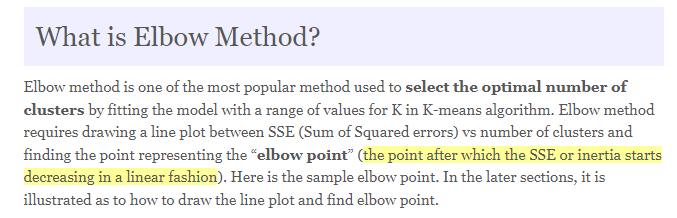

In [ ]:
# Hiperparâmetro do KMeans é o número de cluster (n_clusters)
# a quantidade de clusters (Y) depende da analise feita no método de Elbow
model = KMeans(n_clusters = Y , random_state=42)
clusters = model.fit_predict(dados_padrao)
Counter(clusters.tolist())

In [ ]:
# Quantidade de observações em cada cluster
Counter(clusters.tolist())

In [ ]:
# Centro do Cluster
model.cluster_centers_

In [ ]:
# Classificar o cliente em um dos cluster
# 1) calcular a distância euclidiana para cada cluster utilizando o centro de cada cluster
# 2) o cluster do cliente será aquele com a menor distância calculada em 1)


In [ ]:
# Hiperparâmetro do KMeans é o número de cluster (n_clusters)
clustersx = model.fit_predict(dados_padrao)

In [ ]:
# Quantidade de observações em cada cluster
Counter(clustersx.tolist())

In [ ]:
# Centro do Cluster
model.cluster_centers_

In [ ]:
dados['clusterx'] = model.predict(dados_padrao)
dados.head()


In [ ]:
dados[['clusterx']].value_counts()/len(dados)*100
 

In [ ]:
# Caracterização dos clusters
sns.pairplot(dados,hue='clusterx',palette='coolwarm')

In [ ]:
dados.groupby(dados['clusterx'])['valor'].mean().reset_index()

In [ ]:
dados.groupby(dados['clusterx'])['recencia'].mean().reset_index()

In [ ]:
dados.groupby(dados['clusterx'])['compras'].mean().reset_index()

In [ ]:
 # Variáveis segmentadoras  com a variável clusters
import matplotlib.pyplot as plt  
sns.boxplot(x='clusterx', y='valor', data=dados)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

In [ ]:
 # Variáveis segmentadoras  com a variável clusters
 
sns.boxplot(x='clusterx', y='recencia', data=dados)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

In [ ]:
# Variáveis segmentadoras  com a variável clusters
 
sns.boxplot(x='clusterx', y='compras', data=dados)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()